## Criando base de dados a partir da [imagem](https://raw.githubusercontent.com/scadriano/machinelearning/main/datasets/Jogar_Tenis.png)

In [88]:
import pandas as pd

data = pd.DataFrame([
    ["Ensolarado", "Quente",    "Alta",   "Fraco", "Não"],
    ["Ensolarado", "Quente",    "Alta",   "Forte", "Não"],
    ["Nublado",    "Quente",    "Alta",   "Fraco", "Sim"],
    ["Chuvoso",    "Moderada",  "Alta",   "Fraco", "Sim"],
    ["Chuvoso",    "Agradável", "Normal", "Fraco", "Sim"],
    ["Chuvoso",    "Agradável", "Normal", "Forte", "Não"],
    ["Nublado",    "Agradável", "Normal", "Forte", "Sim"],
    ["Ensolarado", "Moderada",  "Alta",   "Fraco", "Não"],
    ["Ensolarado", "Agradável", "Normal", "Fraco", "Sim"],
    ["Chuvoso",    "Moderada",  "Normal", "Fraco", "Sim"],
    ["Ensolarado", "Moderada",  "Normal", "Forte", "Sim"],
    ["Nublado",    "Moderada",  "Alta",   "Fraco", "Sim"],
    ["Nublado",    "Quente",    "Normal", "Fraco", "Sim"],
    ["Chuvoso",    "Moderada",  "Alta",   "Forte", "Não"],
])

data.columns = ["Tempo", "Temperatura", "Umidade", "Vento", "Jogar Tênis"]

display(data)


,Tempo,Temperatura,Umidade,Vento,Jogar Tênis
0,Ensolarado,Quente,Alta,Fraco,Não
1,Ensolarado,Quente,Alta,Forte,Não
2,Nublado,Quente,Alta,Fraco,Sim
3,Chuvoso,Moderada,Alta,Fraco,Sim
4,Chuvoso,Agradável,Normal,Fraco,Sim
5,Chuvoso,Agradável,Normal,Forte,Não
6,Nublado,Agradável,Normal,Forte,Sim
7,Ensolarado,Moderada,Alta,Fraco,Não
8,Ensolarado,Agradável,Normal,Fraco,Sim
9,Chuvoso,Moderada,Normal,Fraco,Sim


In [89]:
shape = data.shape
X = data.iloc[:, 0:(shape[1] - 1)].values
y = data.iloc[:, (shape[1]-1)].values


In [90]:
X

array([['Ensolarado', 'Quente', 'Alta', 'Fraco'],
       ['Ensolarado', 'Quente', 'Alta', 'Forte'],
       ['Nublado', 'Quente', 'Alta', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Agradável', 'Normal', 'Forte'],
       ['Nublado', 'Agradável', 'Normal', 'Forte'],
       ['Ensolarado', 'Moderada', 'Alta', 'Fraco'],
       ['Ensolarado', 'Agradável', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Normal', 'Fraco'],
       ['Ensolarado', 'Moderada', 'Normal', 'Forte'],
       ['Nublado', 'Moderada', 'Alta', 'Fraco'],
       ['Nublado', 'Quente', 'Normal', 'Fraco'],
       ['Chuvoso', 'Moderada', 'Alta', 'Forte']], dtype=object)

In [91]:
y

array(['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Não'], dtype=object)

In [92]:
from sklearn.preprocessing import LabelEncoder

labels = []

for col in range(shape[1] - 1):
  labels.append(LabelEncoder())
  X[:, col] = labels[col].fit_transform(X[:, col])
    
X

array([[1, 2, 0, 1],
       [1, 2, 0, 0],
       [2, 2, 0, 1],
       [0, 1, 0, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 0],
       [2, 0, 1, 0],
       [1, 1, 0, 1],
       [1, 0, 1, 1],
       [0, 1, 1, 1],
       [1, 1, 1, 0],
       [2, 1, 0, 1],
       [2, 2, 1, 1],
       [0, 1, 0, 0]], dtype=object)

In [93]:
import pickle

with open('data.pkl', 'wb') as f:
  pickle.dump([X, y], f)

In [94]:
import pickle

with open('./data.pkl', 'rb') as f:
  X, y = pickle.load(f)

In [95]:
from sklearn.tree import DecisionTreeClassifier

data_tree = DecisionTreeClassifier()

data_tree.fit(X, y)
data_tree.classes_

array(['Não', 'Sim'], dtype=object)

In [96]:
data_tree.feature_importances_

array([0.31555556, 0.15555556, 0.28      , 0.24888889])

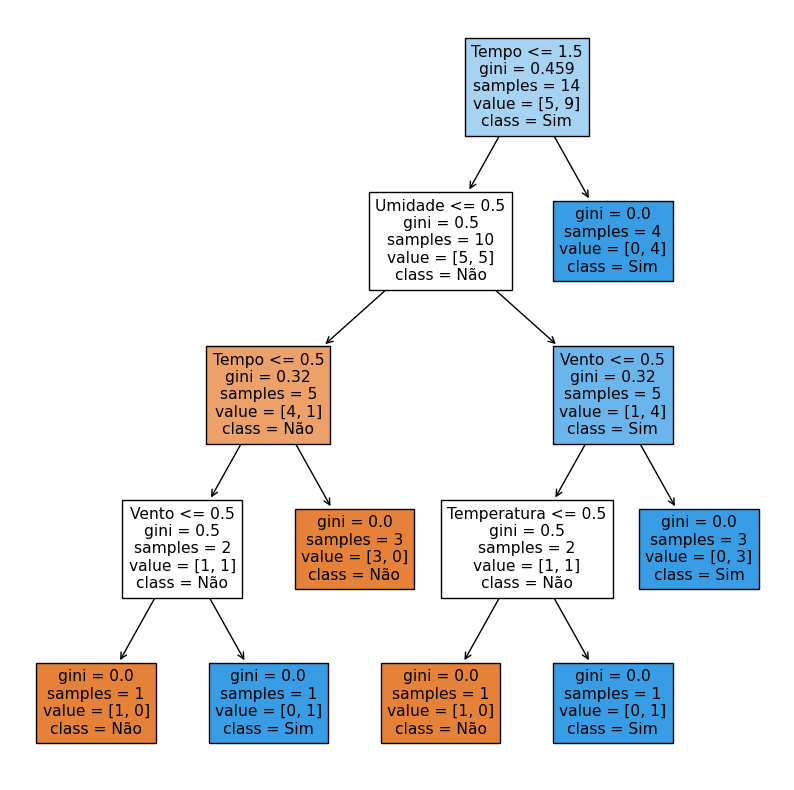

In [97]:
import matplotlib.pyplot as plt
from sklearn import tree


previsores = data.columns[0:(data.shape[1] - 1)].tolist()
class_names = data_tree.classes_.tolist()

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
tree.plot_tree(data_tree, feature_names=previsores, class_names=class_names, filled=True)
plt.show()


### Testando o modelo

In [98]:
testes = [["Ensolarado", "Moderada",  "Normal", "Forte"],
          ["Chuvoso",    "Agradável", "Normal", "Fraco"],
          ["Nublado",    "Quente",    "Normal", "Forte"],
          ["Nublado",    "Agradável", "Alta",   "Forte"]]

for teste in testes:
  teste_numerico = []
  for dado in teste:
    if dado in ("Chuvoso", "Agradável", "Alta", "Forte"):
      teste_numerico.append(0)
    elif dado in ("Ensolarado", "Moderada", "Normal", "Fraco"):
      teste_numerico.append(1)
    elif dado in ("Nublado", "Quente"):
      teste_numerico.append(2)
    else:
      print("Dado informado errado!")
      break
  previsao = tree_jogartenis.predict([teste_numerico])
  print(f'Previsão: {previsao}')

Previsão: ['Sim']
Previsão: ['Sim']
Previsão: ['Sim']
Previsão: ['Sim']
